In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [2]:
trainDir = r"/home/trojan/Desktop/dimentia/data_10slices/dataset with PGGAN/train"
input_shape = Input(shape=(256, 256, 3))
dropout_rate = 0.2
batch_size = 16

In [3]:
def lr_schedule(epoch):
    lr = 1e-4 #1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 40: # 120
        lr *= 1e-2
    elif epoch > 20: #80
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(trainDir, target_size=(256, 256), batch_size=batch_size, 
                                                    class_mode='categorical', color_mode='rgb',
                                                   subset='training')

validation_generator = train_datagen.flow_from_directory(trainDir, target_size=(256, 256), batch_size=batch_size,
                                                     class_mode='categorical', color_mode='rgb',
                                                        subset='validation')

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

Found 15743 images belonging to 2 classes.
Found 3934 images belonging to 2 classes.


In [5]:
cnn_top = Conv2D(32, (5,5), padding='same', activation='relu')(input_shape)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(512, (3,3), padding='same', activation='relu',)(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Flatten()(cnn_top)
cnn_top = Dense(256)(cnn_top)

#cropped_image = tf.keras.layers.experimental.preprocessing.CenterCrop(height=128, width=128)(input_shape)
cropped_image = tf.image.central_crop(input_shape, central_fraction=0.5)
rescaled_mid = tf.keras.layers.experimental.preprocessing.Resizing(256, 256, interpolation='bilinear')(cropped_image)
cnn_mid = Conv2D(32, (5,5), padding='same', activation='relu')(rescaled_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(512, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Flatten()(cnn_mid)
cnn_mid = Dense(256)(cnn_mid)

'''resized_bot = tf.keras.layers.experimental.preprocessing.Resizing(64, 64, interpolation='bilinear')(input_shape)
cnn_bot = Conv2D(32, (5,5), padding='same', activation='relu')(resized_bot)
cnn_bot = BatchNormalization()(cnn_bot)
cnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)
cnn_bot = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_bot)
cnn_bot = BatchNormalization()(cnn_bot)
cnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)
cnn_bot = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_bot)
cnn_bot = BatchNormalization()(cnn_bot)
cnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)
cnn_bot = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_bot)
cnn_bot = BatchNormalization()(cnn_bot)
cnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)
cnn_bot = Conv2D(512, (3,3), padding='same', activation='relu')(cnn_bot)
cnn_bot = BatchNormalization()(cnn_bot)
cnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)
cnn_bot = Flatten()(cnn_bot)
cnn_bot = Dense(256)(cnn_bot)'''

"resized_bot = tf.keras.layers.experimental.preprocessing.Resizing(64, 64, interpolation='bilinear')(input_shape)\ncnn_bot = Conv2D(32, (5,5), padding='same', activation='relu')(resized_bot)\ncnn_bot = BatchNormalization()(cnn_bot)\ncnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)\ncnn_bot = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_bot)\ncnn_bot = BatchNormalization()(cnn_bot)\ncnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)\ncnn_bot = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_bot)\ncnn_bot = BatchNormalization()(cnn_bot)\ncnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)\ncnn_bot = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_bot)\ncnn_bot = BatchNormalization()(cnn_bot)\ncnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)\ncnn_bot = Conv2D(512, (3,3), padding='same', activation='relu')(cnn_bot)\ncnn_bot = BatchNormalization()(cnn_bot)\ncnn_bot = MaxPooling2D(pool_size=(2, 2))(cnn_bot)\ncnn_bot = Flatten()(cnn_bot)\ncnn_bot = Dense(256)(cn

In [6]:
merged_model = concatenate([cnn_top, cnn_mid])

#final_model = Dropout(dropout_rate)(merged_model)
#inal_model = BatchNormalization()(merged_model)
final_model = Dense(256)(merged_model)
final_model = Dropout(dropout_rate)(final_model)
final_model = Dense(128)(merged_model)
final_model = Dropout(dropout_rate)(final_model)
#final_model = BatchNormalization()(final_model)
final_model = Dense(2)(final_model)
final_model = Activation('softmax')(final_model)

final_model = Model(input_shape, final_model)

In [7]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr_schedule(0)),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

final_model.summary()

Learning rate:  0.0001
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
tf_op_layer_Slice (TensorFlowOp [(None, 128, 128, 3) 0           input_1[0][0]                    
__________________________________________________________________________________________________
resizing (Resizing)             (None, 256, 256, 3)  0           tf_op_layer_Slice[0][0]          
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 2432        input_1[0][0]                    
________________________________________________________________

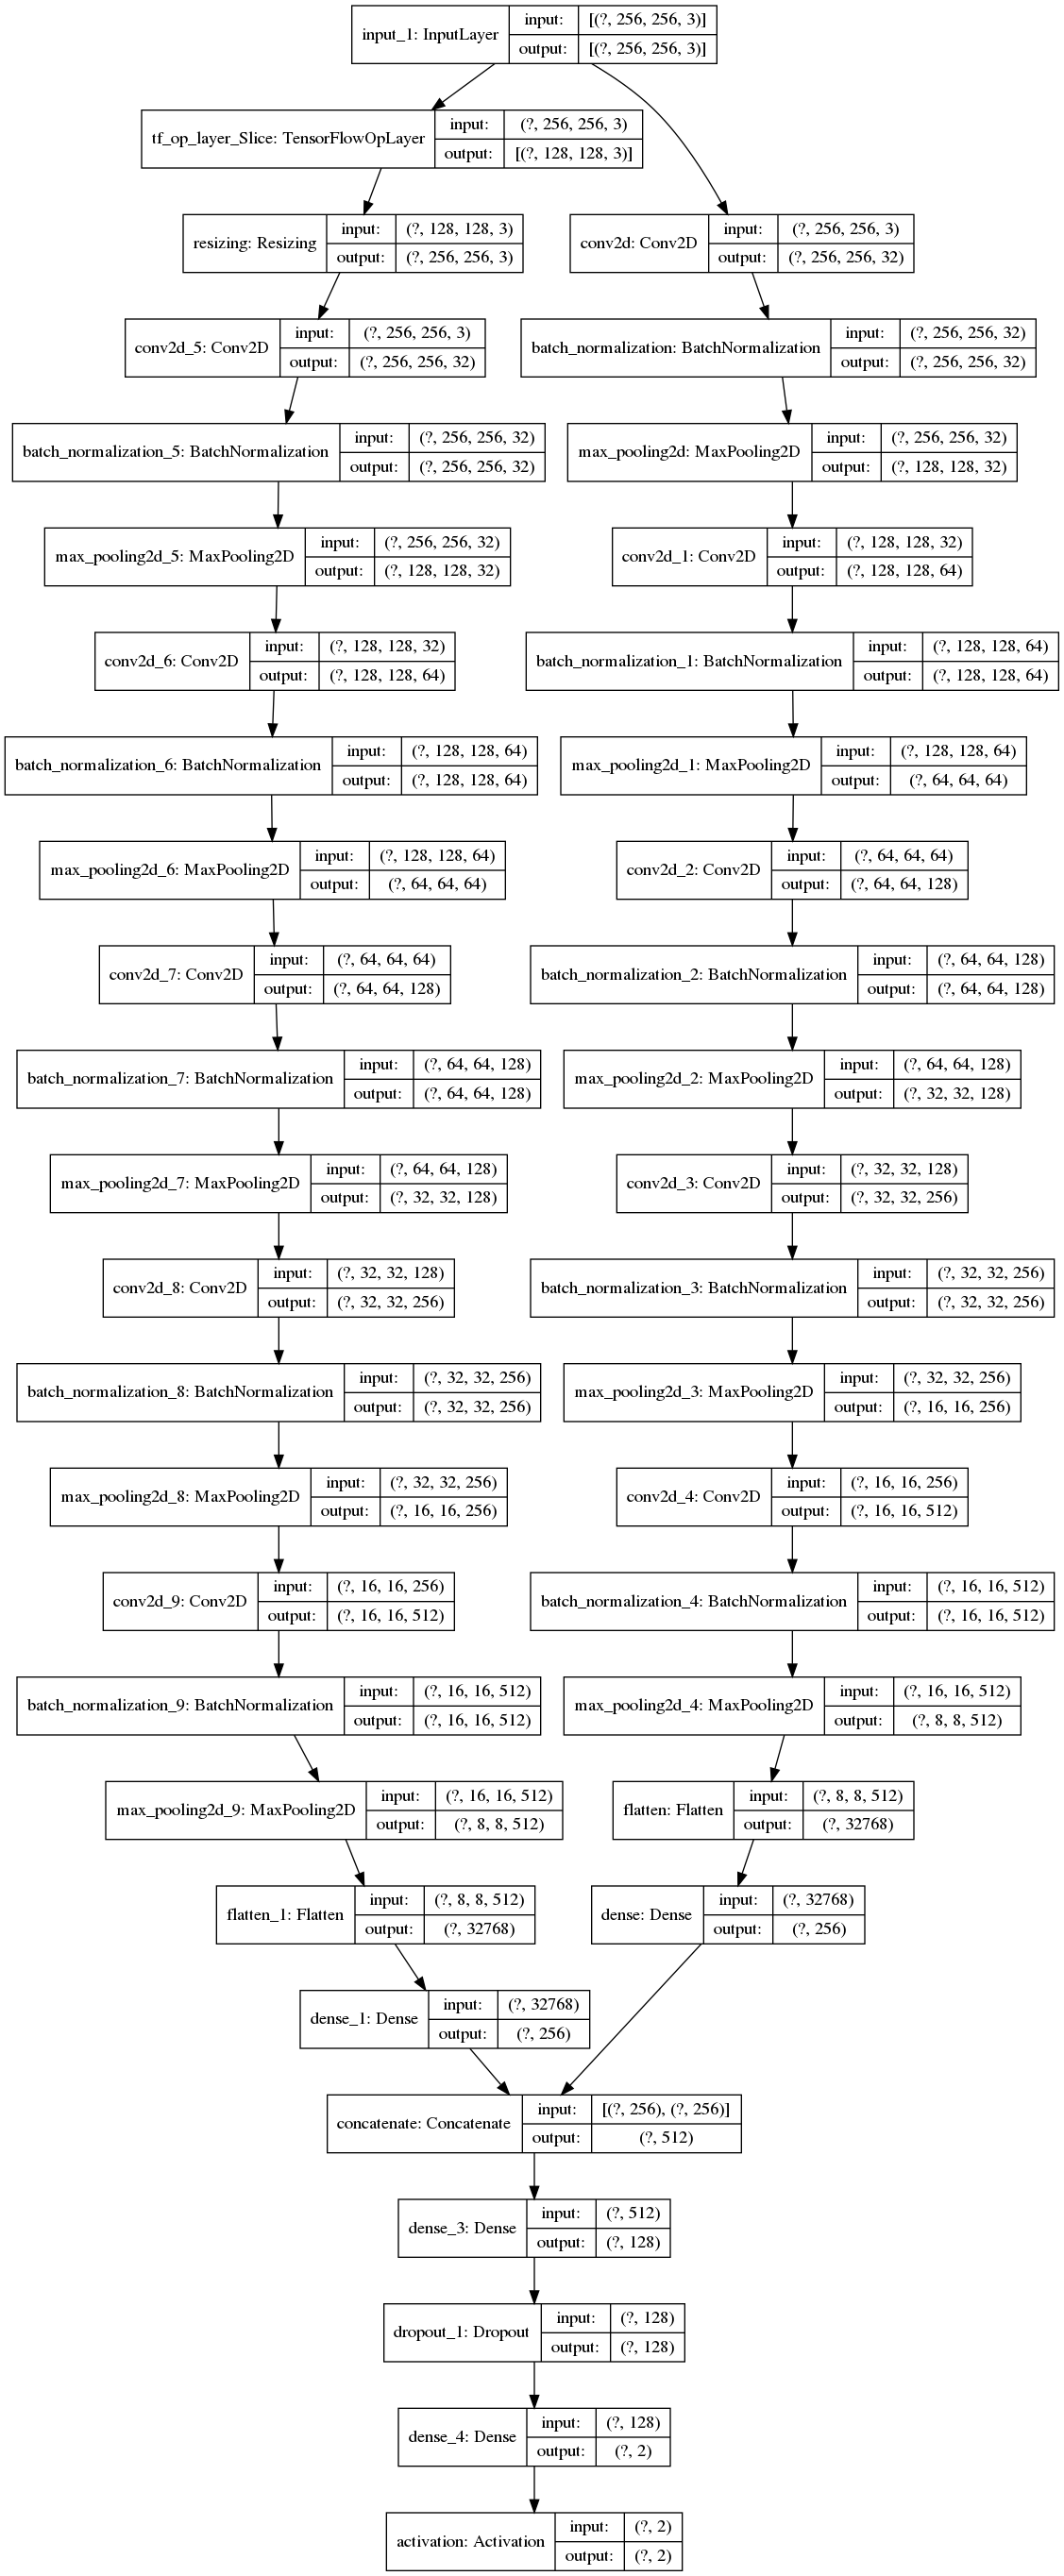

In [8]:
tf.keras.utils.plot_model(final_model, to_file='my_model.png', show_shapes=True)

In [9]:
checkpoint = ModelCheckpoint('best_model_method2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

In [10]:
#final_train_generator = zip(train_generator, train_generator, train_generator)
#final_test_generator  = zip(test_generator, test_generator, test_generator)
final_model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=50,
                          validation_data=validation_generator, verbose=1, workers=1, 
                          validation_steps=STEP_SIZE_VALID, callbacks=checkpoint)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
983/983 [==============================] - ETA: 0s - loss: 3.7846 - accuracy: 0.6943
Epoch 00001: val_accuracy improved from -inf to 0.81378, saving model to best_model_method2.h5
983/983 [==============================] - 214s 218ms/step - loss: 3.7846 - accuracy: 0.6943 - val_loss: 1.5506 - val_accuracy: 0.8138
Epoch 2/50
983/983 [==============================] - ETA: 0s - loss: 2.2424 - accuracy: 0.7775
Epoch 00002: val_accuracy improved from 0.81378 to 0.81480, saving model to best_model_method2.h5
983/983 [==============================] - 68s 69ms/step - loss: 2.2424 - accuracy: 0.7775 - val_loss: 1.7364 - val_accuracy: 0.8148
Epoch 3/50
983/983 [==============================] - ETA: 0s - loss: 1.5952 - accuracy: 0.8253
Epoch 00003: val_accuracy improved from 0.81480 to 0.83546, saving model to best_model_method2.h5
983/983 [==============================] - 69s 70ms/step - loss: 1.5952 - acc

Epoch 26/50
983/983 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9912
Epoch 00026: val_accuracy did not improve from 0.99184
983/983 [==============================] - 64s 65ms/step - loss: 0.0431 - accuracy: 0.9912 - val_loss: 0.2081 - val_accuracy: 0.9651
Epoch 27/50
983/983 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9934
Epoch 00027: val_accuracy did not improve from 0.99184
983/983 [==============================] - 64s 66ms/step - loss: 0.0299 - accuracy: 0.9934 - val_loss: 0.0708 - val_accuracy: 0.9849
Epoch 28/50
983/983 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9940
Epoch 00028: val_accuracy did not improve from 0.99184
983/983 [==============================] - 64s 65ms/step - loss: 0.0230 - accuracy: 0.9940 - val_loss: 0.2015 - val_accuracy: 0.9658
Epoch 29/50
983/983 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9932
Epoch 00029: val_accuracy did not improve from 0

In [11]:
from tensorflow.keras.models import load_model
model = load_model('best_model_method2.h5')

In [12]:
score = model.evaluate_generator(generator=validation_generator, verbose=1,
steps=STEP_SIZE_VALID)

print("Loss: ", score[0], "Accuracy: ", score[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
245/245 [==============================] - 8s 32ms/step - loss: 0.0408 - accuracy: 0.9918
Loss:  0.04077726602554321 Accuracy:  0.9918367266654968
